### **CLASIFICACIÓN DE**  **IMAGENES**


##Nombres: Yesenia Ibet Huamani Huallpa

## Conectar al drive y uso de librerias

In [23]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from keras.utils import to_categorical
import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
imgpath = "/content/drive/MyDrive/sportimages"

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/sportimages
/content/drive/MyDrive/sportimages/americano 1
/content/drive/MyDrive/sportimages/basket 15
Directorios leidos: 2
Imagenes en cada directorio [16, 8]
suma Total de imagenes en subdirs: 24


<>:26: SyntaxWarning: invalid escape sequence '\.'
<>:26: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2484333058.py:26: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


Cantidad etiquetas creadas:  24
0 americano
1 basket
Total number of outputs :  2
Output classes :  [0 1]
Training data shape :  (18, 128, 128, 3) (18,)
Testing data shape :  (6, 128, 128, 3) (6,)


Text(0.5, 1.0, 'Ground Truth : 0')

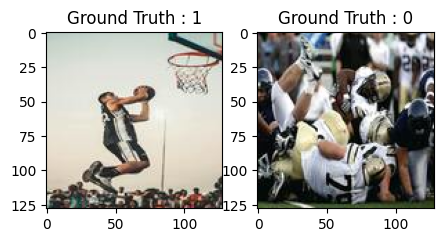

In [24]:
#Generando una lista de etiquetas
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.25)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))



In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU

In [26]:
train_X_ = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 127.
test_X = test_X / 127.

In [27]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [28]:
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1.]


In [29]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [30]:
INIT_LR = 1e-4
epochs = 6
batch_size = 4

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU

sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(128,128,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(2, activation='softmax'))

sport_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │     4,194,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,195,298 (16.00 MB)

 Trainable params: 4,195,298 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [35]:
sport_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR),
    metrics=['accuracy']
)

In [36]:
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))


Epoch 1/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.3595 - loss: 0.8204 - val_accuracy: 0.0000e+00 - val_loss: 1.1447
Epoch 2/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5202 - loss: 0.6917 - val_accuracy: 1.0000 - val_loss: 0.4454
Epoch 3/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5488 - loss: 0.7452 - val_accuracy: 1.0000 - val_loss: 0.3164
Epoch 4/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6607 - loss: 0.7953 - val_accuracy: 1.0000 - val_loss: 0.4719
Epoch 5/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4714 - loss: 0.8668 - val_accuracy: 1.0000 - val_loss: 0.4360
Epoch 6/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7119 - loss: 0.6745 - val_accuracy: 0.7500 - val_loss: 0.6558


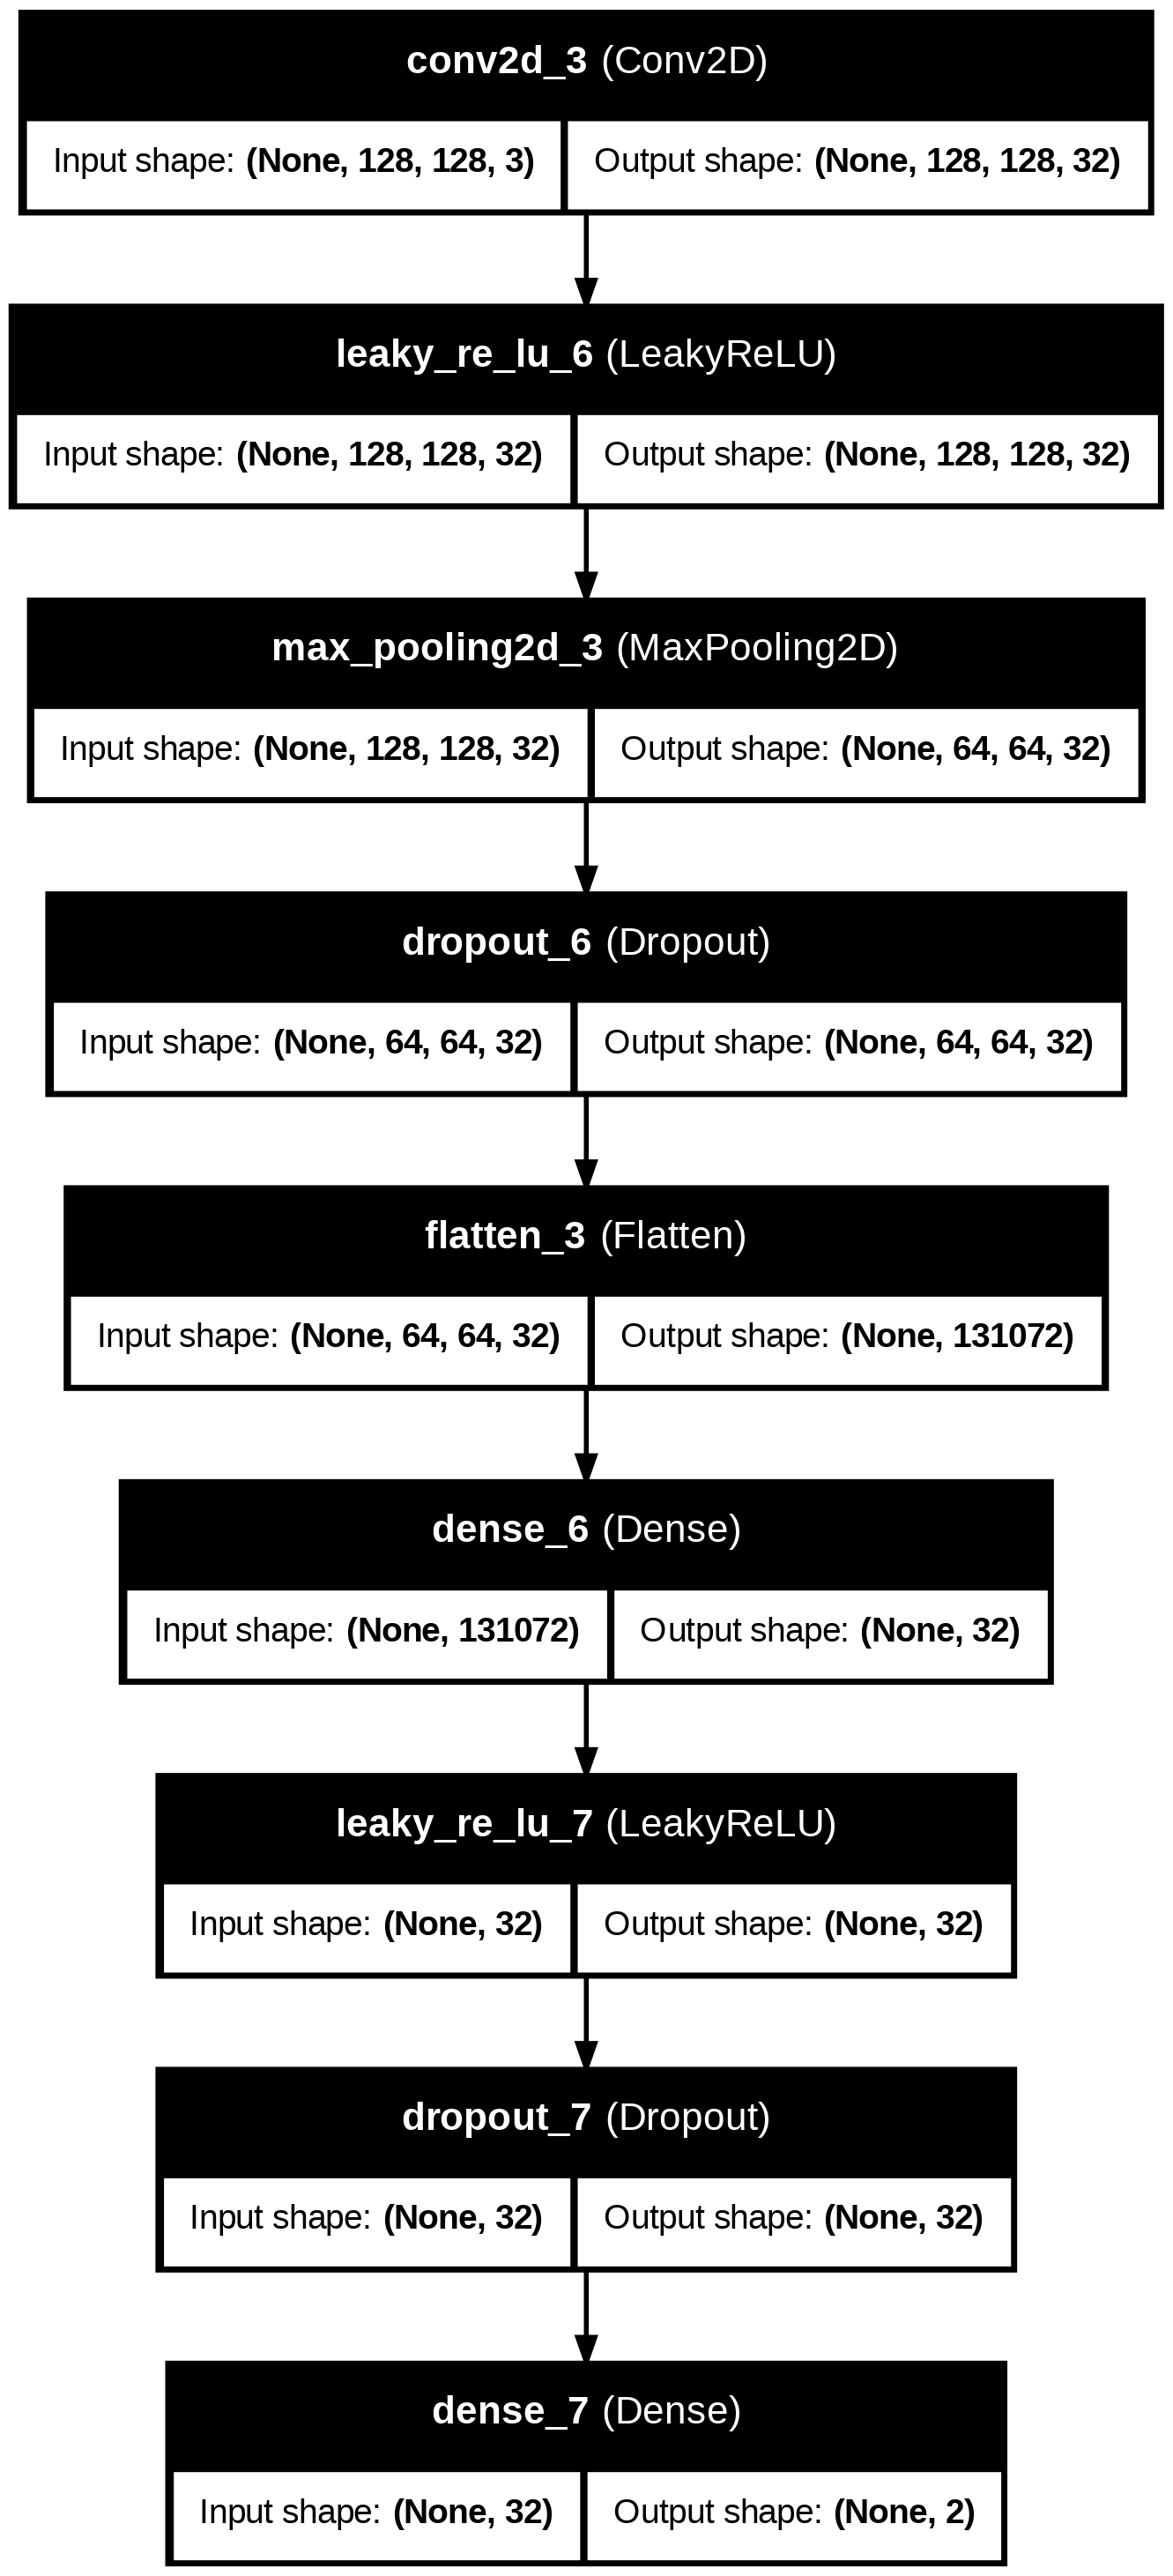

In [38]:

 from tensorflow.keras.utils import plot_model
 plot_model(sport_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [39]:
x=np.array(images, dtype=np.float32)
y=np.array(labels)
classes=np.unique(y)
num_classes=len(classes)
print('Total de clases: ', num_classes)

Total de clases:  2


In [40]:
sport_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [41]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print("Test loss:", test_eval[0])
print("Test accuracy:", test_eval[1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step - accuracy: 0.5000 - loss: 0.6951
Test loss: 0.6950585842132568
Test accuracy: 0.5


In [42]:
predicted_classes2 = sport_model.predict(test_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [43]:
predicted_classes = []
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))

predicted_classes = np.array(predicted_classes)

In [44]:
predicted_classes.shape, test_Y.shape

((6,), (6,))

Found 3 correct labels


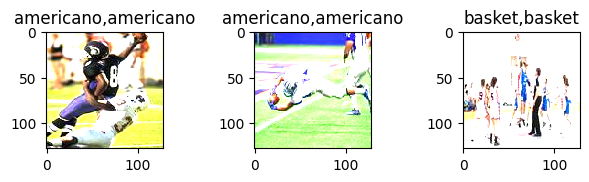

In [45]:
correct=np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title( "{},{}".format( deportes[predicted_classes[correct]],deportes[test_Y[correct]]))
    plt.tight_layout()

Found 3 correct labels


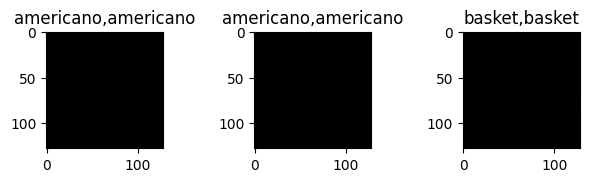

In [46]:
correct=np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, c in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[c].astype(np.uint8))
    plt.title( "{},{}".format(deportes[predicted_classes[c]],deportes[test_Y[c]]))
    plt.tight_layout()

Found 3 incorrect labels


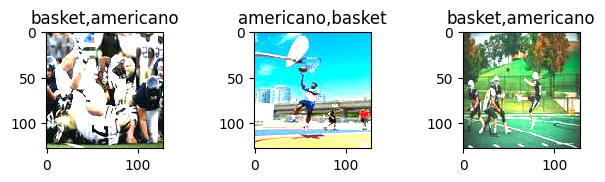

In [47]:
incorrect=np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))

for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title( "{},{}".format(deportes[predicted_classes[incorrect]],deportes[test_Y[incorrect]]))
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


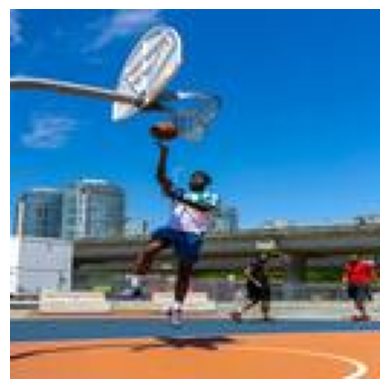

Predicción: basket


In [62]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

import os

nombre_archivo = "/content/drive/MyDrive/sportimages/basket/pexels-pnw-prod-8979855.jpg"

image = plt.imread(nombre_archivo)

image_resized = resize(image, (128, 128, 3), anti_aliasing=True)
image_resized = image_resized.astype('float32') / 255.0
image_input = np.expand_dims(image_resized, axis=0)

# Predicción
prediction = sport_model.predict(image_input)
predicted_class = np.argmax(prediction, axis=1)[0]

# Clases
class_names = ["basket", "americano"]
predicted_label = class_names[predicted_class]

# Mostrar imagen
plt.imshow(image)
plt.axis('off')
plt.show()

print("Predicción:", predicted_label)